In [ ]:
import os
import zipfile
import pandas as pd
import librosa
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import random

In [ ]:
# 1. 압축된 .wav 파일 폴더를 업로드하고 압축 해제
zip_file_path = '/content/output_segments.zip'  # 압축 파일 경로
output_folder = '/content/audio_files'     # 압축 해제 경로
os.makedirs(output_folder, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

In [ ]:
# 2. pitch 기울기와 억양 주석 추출
def extract_pitch_and_intonation(file_path):
    # librosa로 .wav 파일 로드
    y, sr = librosa.load(file_path, sr=None)

    # Pitch 추출
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)

    pitch = []
    for t in range(pitches.shape[1]):
        index = magnitudes[:, t].argmax()
        pitch.append(pitches[index, t])

    pitch = np.array(pitch)
    pitch_slope = np.gradient(pitch)  # 기울기 추출

    # 억양 주석
    peaks, _ = find_peaks(pitch_slope, height=0.1)  # 임계값 조정 가능
    intonation_annotation = ['rising' if i in peaks else 'falling' for i in range(len(pitch_slope))]

    return pitch_slope, intonation_annotation

In [ ]:
# 3. 폴더 내 모든 .wav 파일 처리
file_list = [os.path.join(output_folder, f) for f in os.listdir(output_folder) if f.endswith('.wav')]

results = []

for file_path in file_list:
    print(f"Processing: {file_path}")
    pitch_slope, intonation_annotation = extract_pitch_and_intonation(file_path)
    results.append({
        'file_path': file_path,
        'pitch_slope': pitch_slope,
        'intonation_annotation': intonation_annotation
    })

In [ ]:
# 4. 결과를 DataFrame으로 저장
df = pd.DataFrame(results)
output_csv_path = '/content/audio_feature.csv'
df.to_csv(output_csv_path, index=False)

print(f"분석 결과가 {output_csv_path}에 저장되었습니다.")

Processing: /content/audio_files/4-6.wav
Processing: /content/audio_files/76-78.wav
Processing: /content/audio_files/74-76.wav
Processing: /content/audio_files/50-52.wav
Processing: /content/audio_files/38-40.wav
Processing: /content/audio_files/54-56.wav
Processing: /content/audio_files/68-70.wav
Processing: /content/audio_files/0-2.wav
Processing: /content/audio_files/66-68.wav
Processing: /content/audio_files/6-8.wav
Processing: /content/audio_files/2-4.wav
Processing: /content/audio_files/70-72.wav
Processing: /content/audio_files/32-34.wav
Processing: /content/audio_files/72-74.wav
Processing: /content/audio_files/78-80.wav
Processing: /content/audio_files/10-12.wav
Processing: /content/audio_files/52-54.wav
Processing: /content/audio_files/62-64.wav
Processing: /content/audio_files/64-66.wav
Processing: /content/audio_files/58-60.wav
Processing: /content/audio_files/44-46.wav
Processing: /content/audio_files/26-28.wav
Processing: /content/audio_files/60-62.wav
Processing: /conten

In [ ]:
# 샘플 5개 선택
sample_rows = df.sample(n=5, random_state=42)

In [ ]:
# 시각화 함수 정의
def visualize_pitch_and_intonation(row):
    file_index = row.name  # DataFrame의 인덱스를 파일 식별자로 사용
    pitch_slope = row['pitch_slope']
    intonation_annotation = row['intonation_annotation']

    # 시간 축 생성
    time_steps = range(len(pitch_slope))

    # 시각화
    plt.figure(figsize=(12, 6))

    # pitch 기울기 플롯
    plt.subplot(2, 1, 1)
    plt.plot(time_steps, pitch_slope, label='Pitch Slope', color='blue')
    plt.title(f'Pitch Slope for Index {file_index}')
    plt.xlabel('Time Steps')
    plt.ylabel('Slope')
    plt.grid(True)
    plt.legend()

    # 억양 레이블링 플롯
    plt.subplot(2, 1, 2)
    plt.scatter(time_steps, pitch_slope, c=['red' if label == 'rising' else 'green' for label in intonation_annotation], label='Intonation')
    plt.title(f'Intonation Annotation for Index {file_index}')
    plt.xlabel('Time Steps')
    plt.ylabel('Slope')
    plt.grid(True)
    plt.legend()

    # 그래프 출력
    plt.tight_layout()
    plt.show()

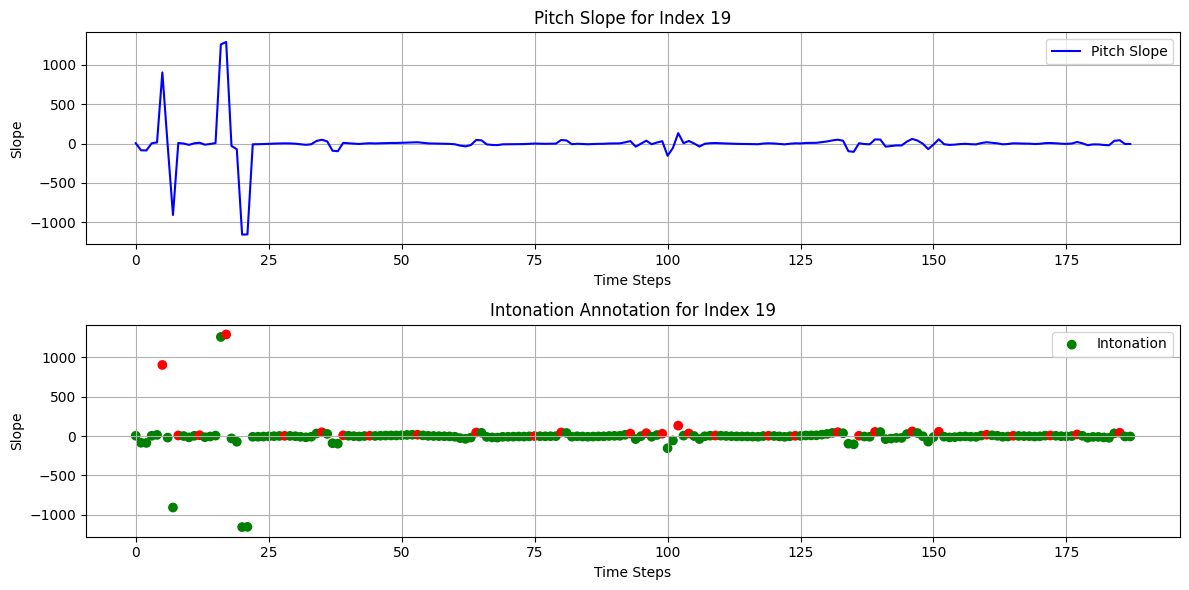

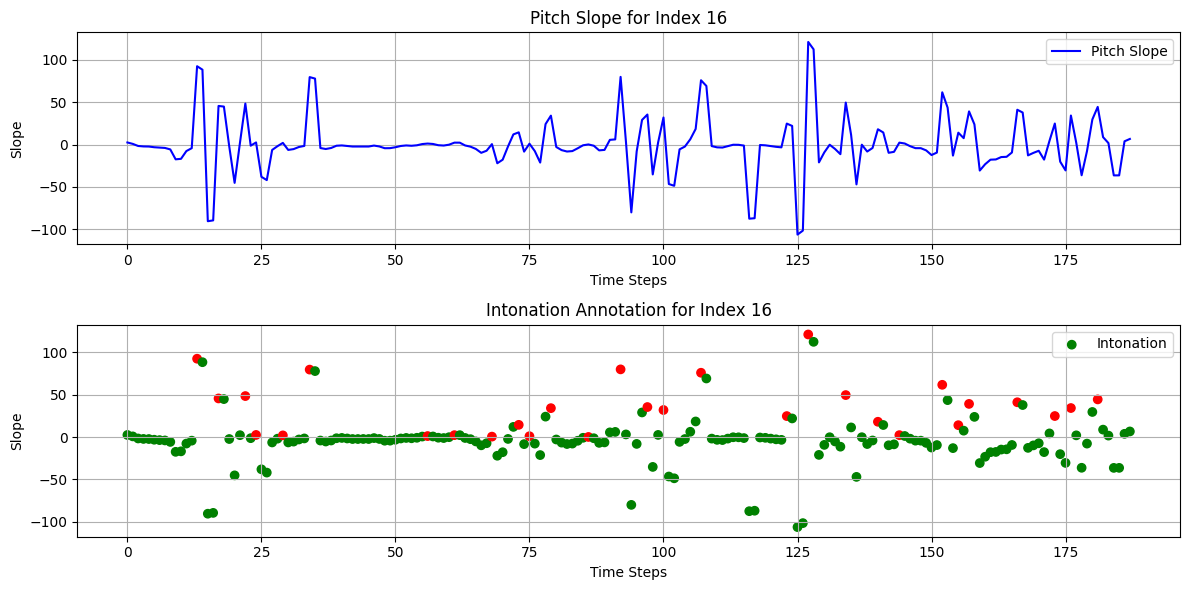

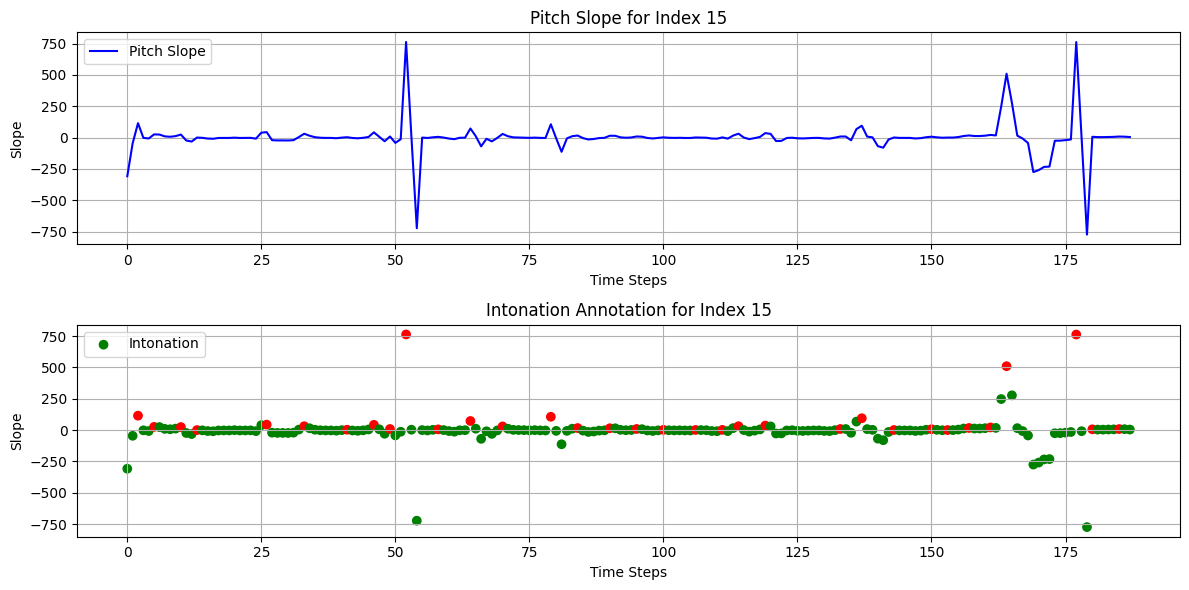

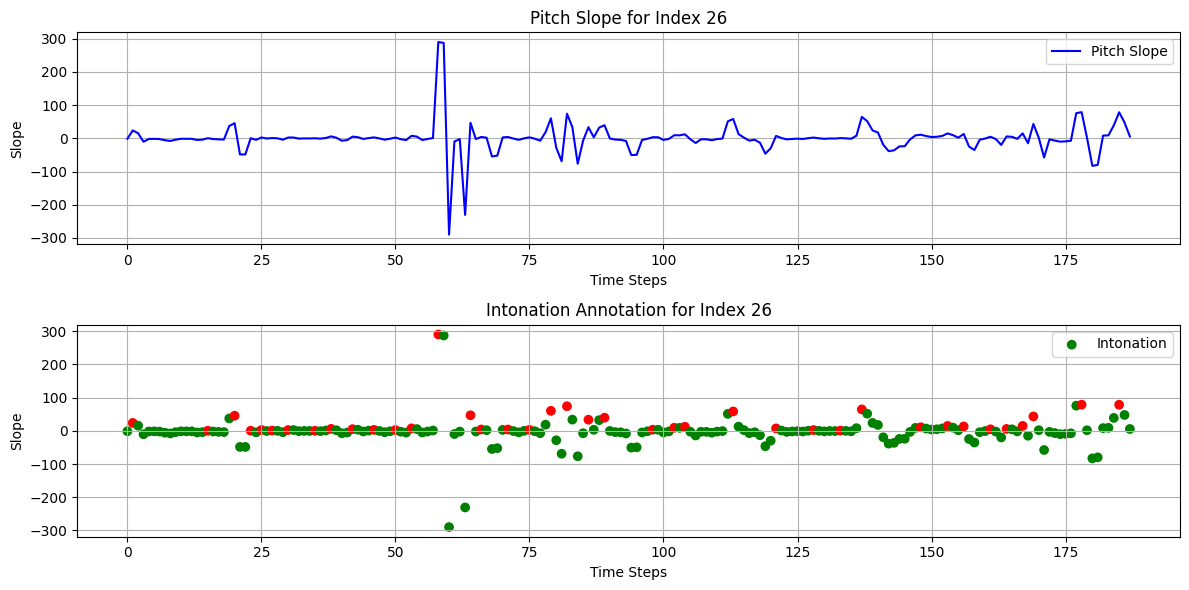

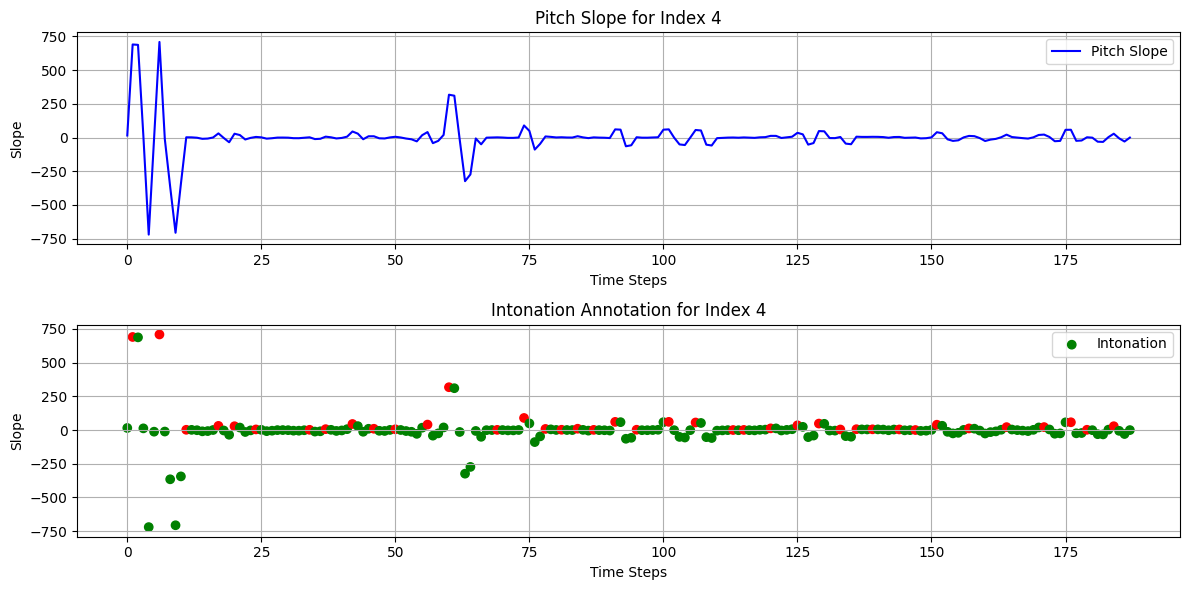

In [ ]:
# 샘플 데이터 시각화
for _, row in sample_rows.iterrows():
    visualize_pitch_and_intonation(row)


In [ ]:
# 1. 압축된 .wav 파일 폴더를 업로드하고 압축 해제
zip_file_path = '/content/output_segments.zip'  # 압축 파일 경로
output_folder = '/content/audio_files'     # 압축 해제 경로
os.makedirs(output_folder, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

# 2. pitch 기울기와 억양 주석 추출
def extract_pitch_and_intonation(file_path):
    # librosa로 .wav 파일 로드
    y, sr = librosa.load(file_path, sr=None)

    # Pitch 추출
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)

    pitch = []
    for t in range(pitches.shape[1]):
        index = magnitudes[:, t].argmax()
        pitch.append(pitches[index, t])

    pitch = np.array(pitch)
    pitch_slope = np.gradient(pitch)  # 기울기 추출

    # 억양 주석
    peaks, _ = find_peaks(pitch_slope, height=0.1)  # 임계값 조정 가능
    intonation_annotation = ['rising' if i in peaks else 'falling' for i in range(len(pitch_slope))]

    return pitch_slope.tolist(), intonation_annotation

# 3. 폴더 내 모든 .wav 파일 처리
file_list = [os.path.join(output_folder, f) for f in os.listdir(output_folder) if f.endswith('.wav')]

results = []

for file_path in file_list:
    print(f"Processing: {file_path}")
    pitch_slope, intonation_annotation = extract_pitch_and_intonation(file_path)
    results.append({
        'file_path': file_path,
        'pitch_slope': pitch_slope,
        'intonation_annotation': intonation_annotation
    })

# 4. 결과를 DataFrame으로 저장
df = pd.DataFrame(results)
output_csv_path = '/content/audio_feature_pitchSlopeList.csv'
df.to_csv(output_csv_path, index=False)

print(f"분석 결과가 {output_csv_path}에 저장되었습니다.")


Processing: /content/audio_files/4-6.wav
Processing: /content/audio_files/76-78.wav
Processing: /content/audio_files/74-76.wav
Processing: /content/audio_files/50-52.wav
Processing: /content/audio_files/38-40.wav
Processing: /content/audio_files/54-56.wav
Processing: /content/audio_files/68-70.wav
Processing: /content/audio_files/0-2.wav
Processing: /content/audio_files/66-68.wav
Processing: /content/audio_files/6-8.wav
Processing: /content/audio_files/2-4.wav
Processing: /content/audio_files/70-72.wav
Processing: /content/audio_files/32-34.wav
Processing: /content/audio_files/72-74.wav
Processing: /content/audio_files/78-80.wav
Processing: /content/audio_files/10-12.wav
Processing: /content/audio_files/52-54.wav
Processing: /content/audio_files/62-64.wav
Processing: /content/audio_files/64-66.wav
Processing: /content/audio_files/58-60.wav
Processing: /content/audio_files/44-46.wav
Processing: /content/audio_files/26-28.wav
Processing: /content/audio_files/60-62.wav
Processing: /conten